In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("House_Rent_Dataset.csv") 

# Exploratory Analysis

In [3]:
data.sample(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1437,2022-07-02,1,7500,630,3 out of 12,Super Area,"Sumit Greendale, Chikhal Dongari",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Agent
1692,2022-05-18,3,22000,1200,4 out of 4,Carpet Area,Bommasandra,Bangalore,Unfurnished,Bachelors,2,Contact Owner
1401,2022-06-25,3,100000,1200,8 out of 14,Carpet Area,Khar West,Mumbai,Furnished,Bachelors/Family,3,Contact Agent
1284,2022-06-28,2,95000,800,6 out of 8,Carpet Area,"Pali Hill Apartment, Pali Hill",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Agent
3686,2022-06-17,2,11000,530,2 out of 3,Super Area,Jyothi Nagar-Ekkatuthangal,Chennai,Semi-Furnished,Bachelors/Family,1,Contact Owner
1114,2022-05-31,2,18500,650,3 out of 12,Carpet Area,"Swayam Apartment, Poonam Gardens",Mumbai,Unfurnished,Family,2,Contact Agent
1891,2022-05-27,2,20000,1250,3 out of 4,Super Area,"Ags Layout, Hebbal",Bangalore,Semi-Furnished,Family,2,Contact Owner
2253,2022-05-05,3,21000,1300,3 out of 3,Super Area,Hormavu Ring Road,Bangalore,Furnished,Bachelors/Family,2,Contact Owner
455,2022-05-15,2,8500,700,Ground out of 2,Super Area,Behala,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2745,2022-07-01,2,8500,60,2 out of 4,Super Area,"Indraprastha Extension, Patparganj",Delhi,Unfurnished,Bachelors/Family,2,Contact Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


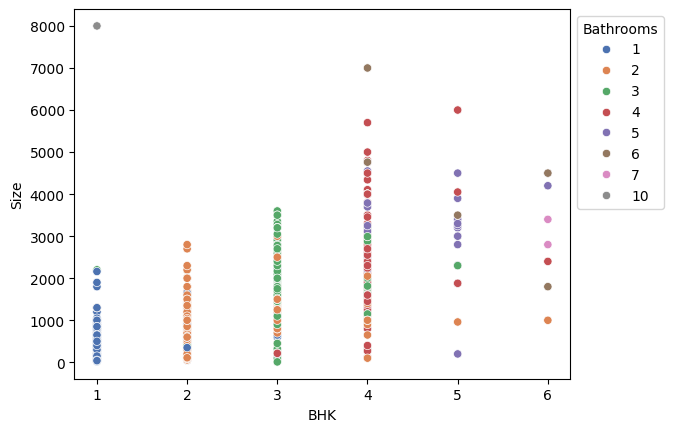

In [5]:
sns.scatterplot(data=data, x='BHK', y='Size', hue='Bathroom', palette='deep')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Bathrooms')

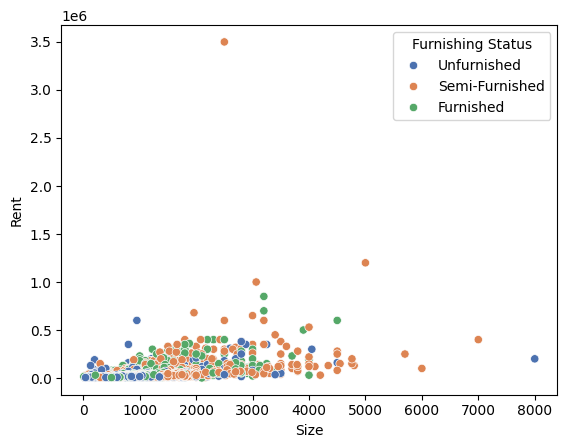

In [6]:
sns.scatterplot(data=data, x='Size', y='Rent', hue='Furnishing Status', palette='deep')
plt.legend(loc='upper right', title='Furnishing Status')
plt.show()

In [7]:
data['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [8]:
data['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

# Preprocessing Stage

In [9]:
data = data[['Size', 'BHK', 'Furnishing Status', 'Bathroom', 'Floor', 'City', 'Area Type', 'Rent']]
data

city_values = data['City'].unique()

### Conversion of Floors into Numerical Values

In [10]:
# Extract numeric part, replace 'Ground' with 1
data['Current Floor'] = data['Floor'].str.extract(r'(\d+|\bGround\b)', expand=False)
data['Current Floor'] = data['Current Floor'].replace('Ground', '1').astype(float)

In [11]:
# Extract total number of floors
data['Total Floors'] = data['Floor'].str.extract(r'out of (\d+)', expand=False).astype(float)

#for cases where "out of" is not there, assume total floors = current floor
data['Total Floors'].fillna(data['Current Floor'], inplace=True)

# Replace 'Total Floors' with 'Current Floor' where 'Total Floors' < 'Current Floor'
data.loc[data['Total Floors'] < data['Current Floor'], 'Total Floors'] = data['Current Floor']

# Create a ratio of floors feature
data['Floor Ratio'] = data['Current Floor'] / data['Total Floors']

In [12]:
# Drop Original Floor
data = data.drop('Floor', axis= 1) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


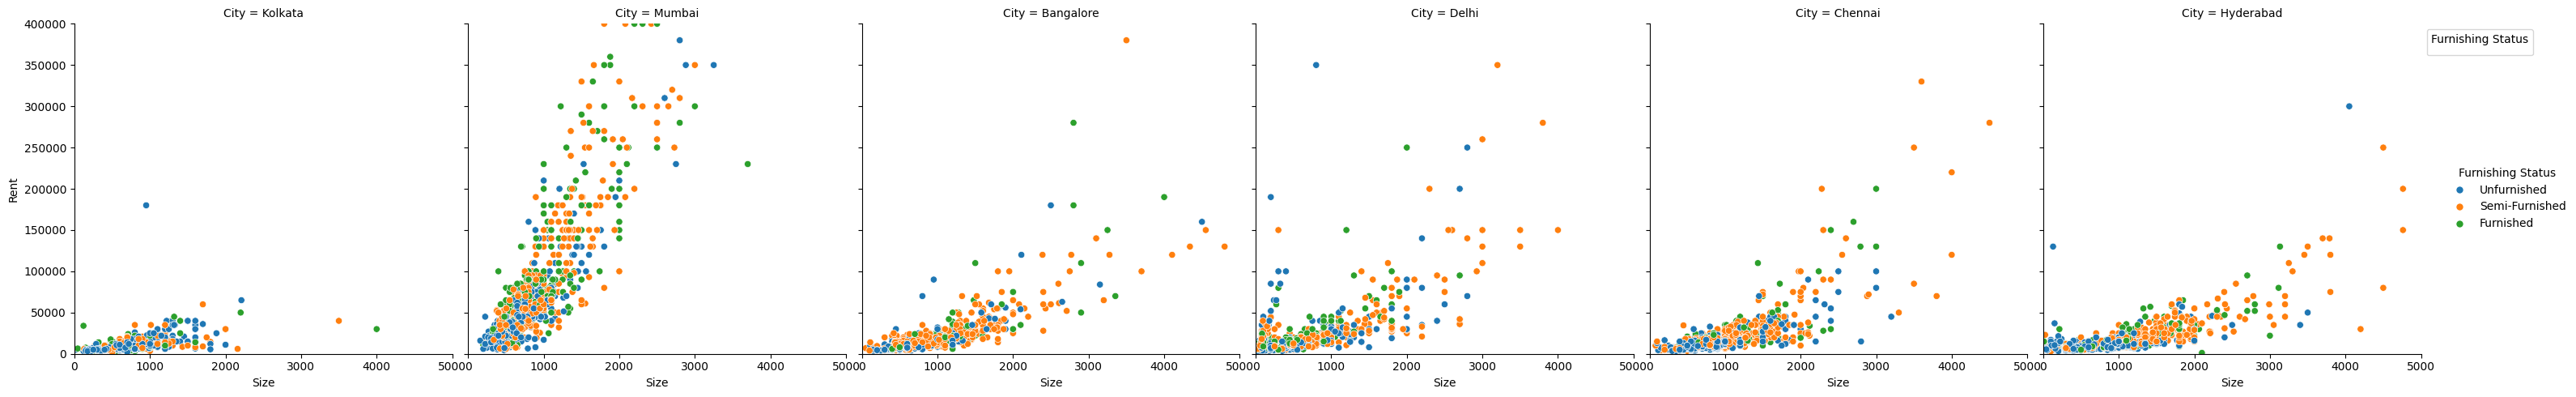

In [13]:
sns.relplot(data=data, x='Size', y='Rent', hue='Furnishing Status', col='City')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Furnishing Status')
plt.ylim(0, 400000)
plt.xlim(0, 5000)
plt.show()

### Ordinal Encoding for Furnishing Status

In [14]:
ranking_order = {'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3}
data['Furnishing Status'] = data['Furnishing Status'].map(ranking_order)
data

,Size,BHK,Furnishing Status,Bathroom,City,Area Type,Rent,Current Floor,Total Floors,Floor Ratio
0,1100,2,1,2,Kolkata,Super Area,10000,1.0,2.0,0.500000
1,800,2,2,1,Kolkata,Super Area,20000,1.0,3.0,0.333333
2,1000,2,2,1,Kolkata,Super Area,17000,1.0,3.0,0.333333
3,800,2,1,1,Kolkata,Super Area,10000,1.0,2.0,0.500000
4,850,2,1,1,Kolkata,Carpet Area,7500,1.0,2.0,0.500000
...,...,...,...,...,...,...,...,...,...,...
4741,1000,2,2,2,Hyderabad,Carpet Area,15000,3.0,5.0,0.600000
4742,2000,3,2,3,Hyderabad,Super Area,29000,1.0,4.0,0.250000
4743,1750,3,2,3,Hyderabad,Carpet Area,35000,3.0,5.0,0.600000
4744,1500,3,2,2,Hyderabad,Carpet Area,45000,23.0,34.0,0.676471


### Conversion of Categorical Variable to One-Hot Encoding

In [15]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True) 
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [16]:
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')

### Removal of Outliers


In [17]:
from scipy.stats import zscore
from scipy.spatial.distance import mahalanobis


def remove_outliers_multivariate(df, cols, z_threshold=3):    

    # Extract features
    features = df[cols]

    # Calculate the covariance matrix
    cov_matrix = np.cov(features, rowvar=False)

    # Calculate the inverse covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calculate the mean values
    mean_values = np.mean(features, axis=0)

    # Calculate Mahalanobis distance for each row
    mahalanobis_distances = np.apply_along_axis(
        lambda row: mahalanobis(row, mean_values, inv_cov_matrix),
        axis=1,
        arr=features.values
    )

    # Create a mask for rows with multivariate outliers
    outliers_mask_rows = mahalanobis_distances > z_threshold ** 2

    # Remove rows with outliers from the DataFrame
    cleaned_df = df[~outliers_mask_rows]

    return cleaned_df

In [18]:
def remove_outliers(df, column, z_threshold=3):
    # Calculate Z-Score for the specified column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Create a mask for rows with outliers in the specified column
    outliers_mask = z_scores > z_threshold

    # Remove rows with outliers from the DataFrame
    cleaned_df = df[~outliers_mask]

    return cleaned_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Size               4746 non-null   int64  
 1   BHK                4746 non-null   int64  
 2   Furnishing Status  4746 non-null   int64  
 3   Bathroom           4746 non-null   int64  
 4   Rent               4746 non-null   int64  
 5   Current Floor      4746 non-null   float64
 6   Total Floors       4746 non-null   float64
 7   Floor Ratio        4746 non-null   float64
 8   Carpet Area        4746 non-null   bool   
 9   Super Area         4746 non-null   bool   
 10  Chennai            4746 non-null   bool   
 11  Delhi              4746 non-null   bool   
 12  Hyderabad          4746 non-null   bool   
 13  Kolkata            4746 non-null   bool   
 14  Mumbai             4746 non-null   bool   
dtypes: bool(7), float64(3), int64(5)
memory usage: 329.2 KB
None


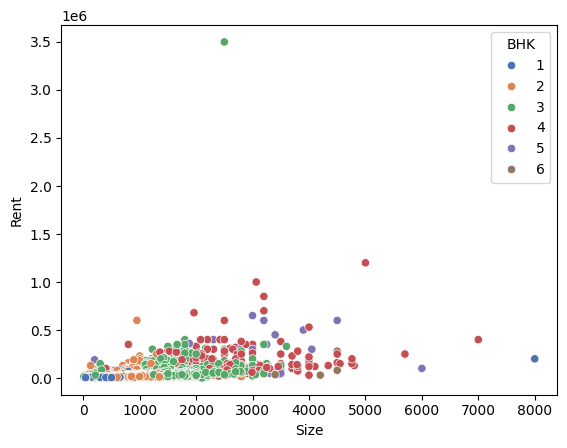

In [19]:
sns.scatterplot(data=data, x='Size', y='Rent', hue='BHK', palette='deep')
print(data.info())

In [20]:
data = remove_outliers(data, 'Rent', 3.75)

In [21]:
data = remove_outliers(data, 'Size', 4)

In [22]:
# Number of Bathrooms and BHk are proportional to the Size of the House
data = remove_outliers_multivariate(data, ['BHK', 'Size', 'Bathroom'], 3)

In [23]:
# Size and Floor Ratio contributes to the rent price of the house
data = remove_outliers_multivariate(data, ['Size', 'Rent', 'Floor Ratio'], 3)

In [24]:
data.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4672 entries, 0 to 4671
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4672 non-null   int64  
 1   Size               4672 non-null   int64  
 2   BHK                4672 non-null   int64  
 3   Furnishing Status  4672 non-null   int64  
 4   Bathroom           4672 non-null   int64  
 5   Rent               4672 non-null   int64  
 6   Current Floor      4672 non-null   float64
 7   Total Floors       4672 non-null   float64
 8   Floor Ratio        4672 non-null   float64
 9   Carpet Area        4672 non-null   bool   
 10  Super Area         4672 non-null   bool   
 11  Chennai            4672 non-null   bool   
 12  Delhi              4672 non-null   bool   
 13  Hyderabad          4672 non-null   bool   
 14  Kolkata            4672 non-null   bool   
 15  Mumbai             4672 non-null   bool   
dtypes: bool(7), float64(3), 

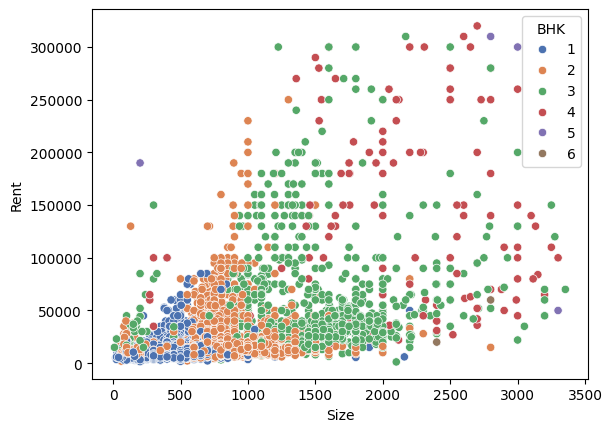

In [25]:
sns.scatterplot(data=data, x='Size', y='Rent', hue='BHK', palette='deep')
print(data.info())

### Splitting Output from Input Space

In [26]:
X = data.drop('Rent', axis= 1) 
y = data['Rent']

### Splitting Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 42)

X_train_raw = X_train
X_test_raw = X_test
y_train_raw = y_train
y_test_raw = y_test


# Modelling

In [28]:
#Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [29]:
# Adding Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test) 

In [30]:
#Regression and Regularization using Ridge Regression
from sklearn.linear_model import Ridge

model = Ridge(alpha=50)
model.fit(X_train, y_train)

Ridge(alpha=50)

# Evaluation

### Quantitative Evaluation

In [31]:
y_preds = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds)) 
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 0.00000000e+00 -3.88770555e+02  1.56178039e+04  8.08088649e+02
  2.26789385e+03  2.80774838e+03 -2.22279714e+02  6.53390261e+02
 -7.27887221e+02  1.51637214e+03 -1.33804969e+03 -2.06810388e+03
  9.29177587e+01 -1.60394162e+03 -8.83918935e+02  9.76583725e+03
 -1.71307881e+03  9.01291056e+02  2.27461044e+03 -7.16608276e+02
 -1.75805767e+03  8.81971087e+02  1.35578726e+02  5.75529738e+02
 -4.32313031e+02  2.56558378e+01 -7.11674122e+01 -9.86568991e+02
  9.29606377e+01 -3.67630527e+03 -3.79855666e+01  3.41503823e+03
  3.19640526e+03 -2.23867688e+03  2.72985544e+03 -1.92472894e+02
  1.35516326e+02 -1.71714587e+02  8.36093925e+02 -1.92472461e+03
 -2.11750990e+03 -1.86697148e+03  1.49458450e+04 -3.49121284e+02
  6.71431638e+02 -5.94265582e+01  3.41542818e+02 -5.15902923e+01
  2.03701837e+02 -3.15845223e+02  2.89515463e+02  3.33991528e+02
  4.52518088e+02  9.33834535e+02 -1.01881711e+03 -1.77555990e+03
  8.46576991e+02 -6.88753585e+02  1.03718992e+01  2.08379017e+02
 -1.14958

### Qualitative Evaluation

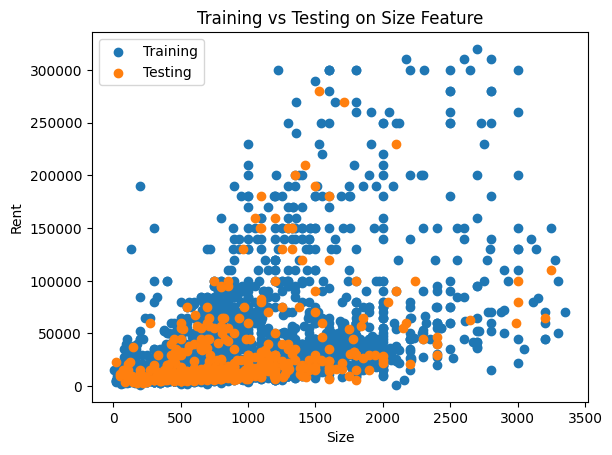

In [33]:
plt.scatter(X_train_raw['Size'], y_train_raw, label='Training')
plt.scatter(X_test_raw['Size'], y_test_raw, label='Testing')

plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend()
plt.title('Training vs Testing on Size Feature')
plt.show()

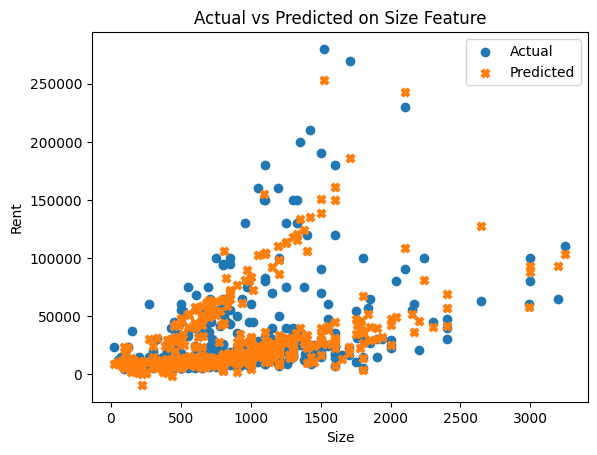

In [34]:
plt.scatter(X_test_raw['Size'], y_test_raw, label='Actual', marker='o')
plt.scatter(X_test_raw['Size'], y_preds, label='Predicted', marker='X')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend()
plt.title('Actual vs Predicted on Size Feature')
plt.show()

In [35]:
sample_data = X.iloc[0] 
sample_data

index                    0
Size                  1100
BHK                      2
Furnishing Status        1
Bathroom                 2
Current Floor          1.0
Total Floors           2.0
Floor Ratio            0.5
Carpet Area          False
Super Area            True
Chennai              False
Delhi                False
Hyderabad            False
Kolkata               True
Mumbai               False
Name: 0, dtype: object

In [36]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_poly = poly.transform(sample_data_standardized)
sample_data_poly

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.        , -1.74214402,  0.3231474 , -0.06475755, -1.10478674,
         0.08970703, -0.47665074, -0.52843118, -0.25970023, -0.95350589,
         0.95441558, -0.48216506, -0.38593756, -0.4708905 ,  2.84251888,
        -0.50156053, -0.5629693 ,  0.11281697,  1.92469762, -0.15628256,
         0.83039423,  0.92060322,  0.45243519,  1.66114458, -1.66272939,
         0.84000097,  0.67235881,  0.82035908, -4.95207727,  0.87379068,
        -0.02092623, -0.35700896,  0.02898859, -0.15402845, -0.17076116,
        -0.08392145, -0.30812295,  0.30841691, -0.15581038, -0.12471472,
        -0.15216704,  0.91855258, -0.16207798,  0.07154328, -0.00580921,
         0.03086673,  0.03421991,  0.01681755,  0.0617467 , -0.06180561,
         0.03122383,  0.02499237,  0.03049371, -0.18407455,  0.03247983,
        -0.09910713,  0.52659742,  0.58380376,  0.28691337,  1.05342067,
        -1.05442568,  0.53268956,  0.4263787 ,  0.52023359, -3.14037718,
         0.55411743, -0.04275892, -0.04740399, -0.0

In [37]:
model_rent_forecast = model.predict(sample_data_poly)[0] 
model_rent_forecast

13215.323097600618

In [38]:
y.iloc[0]

10000